# Regression Plots
lmplot allows you to display linear models, but it also conveniently allows you to split up those plots based off of features, as well as coloring the hue based off of features.


In [1]:
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


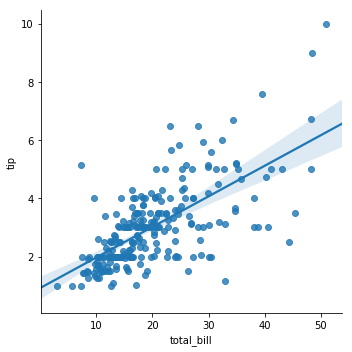

In [3]:
sns.lmplot(x="total_bill", y="tip", data=tips);

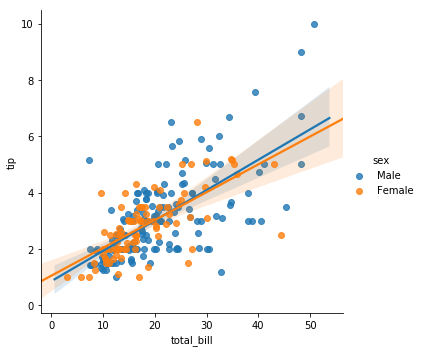

In [4]:
sns.lmplot(x="total_bill", y="tip", data=tips, hue='sex');

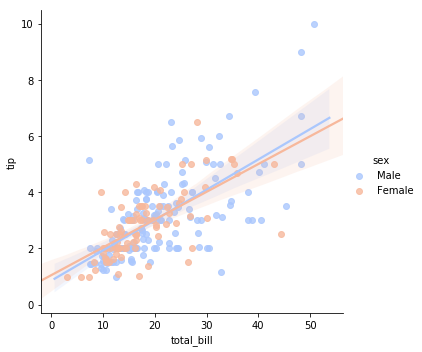

In [5]:
sns.lmplot(x="total_bill", y="tip", data=tips, hue='sex', palette='coolwarm');

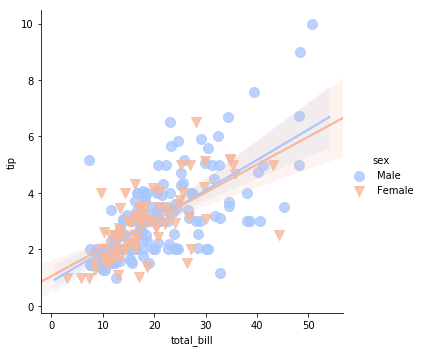

In [6]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm',
           markers=['o','v'],scatter_kws={'s':100});

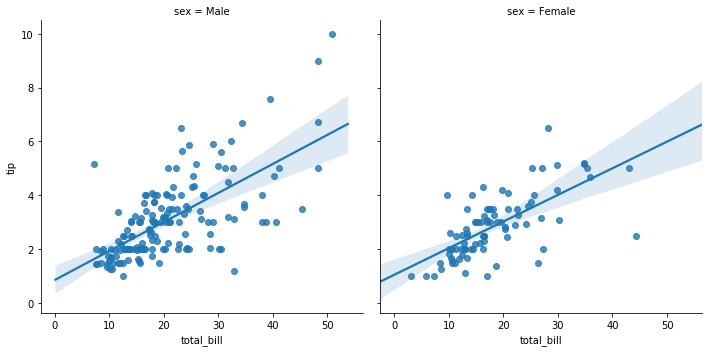

In [7]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex');

In [8]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


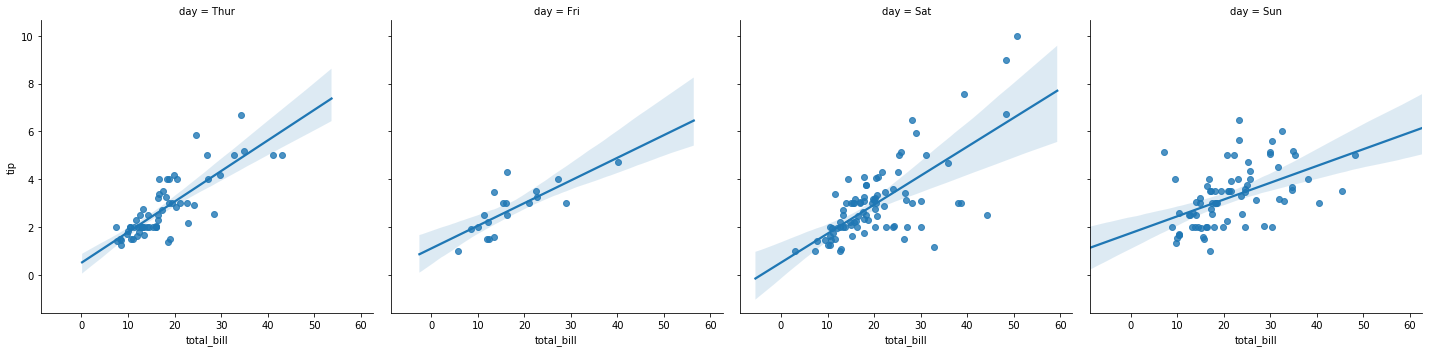

In [9]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day');

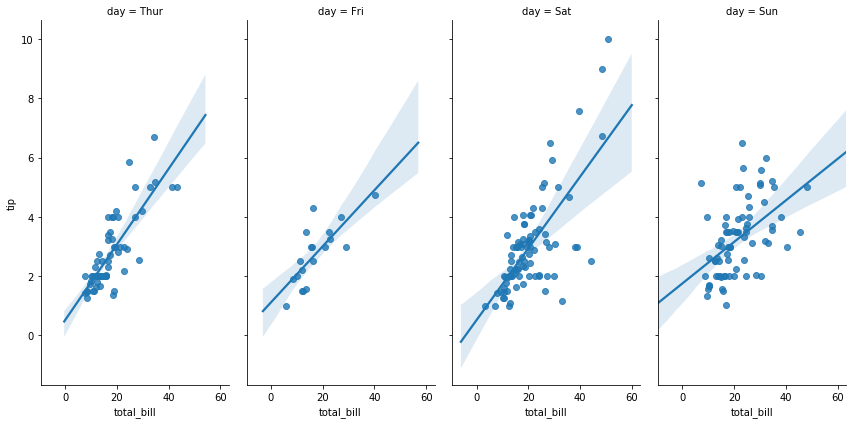

In [10]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day', aspect=0.5, size=6);

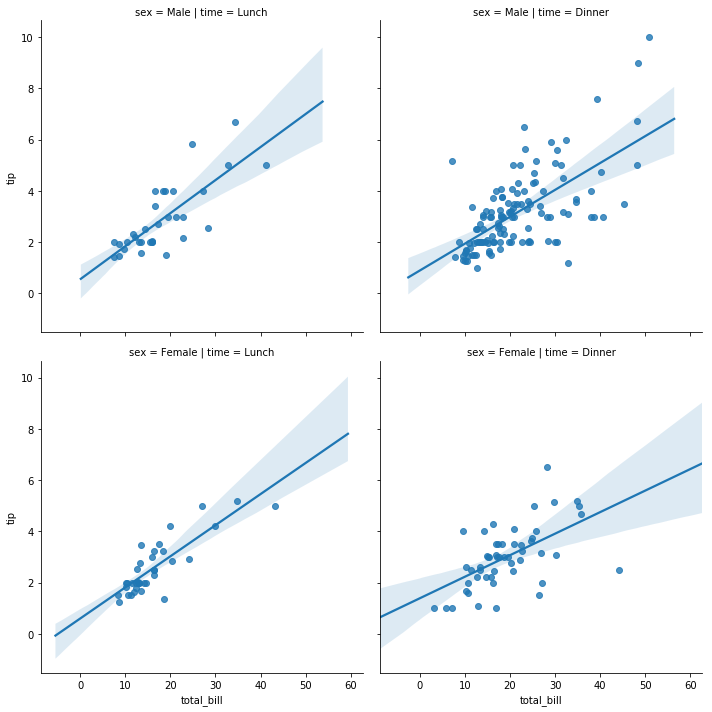

In [11]:
sns.lmplot(x="total_bill", y="tip", data=tips, row="sex", col="time");

# Categorical Data Plots

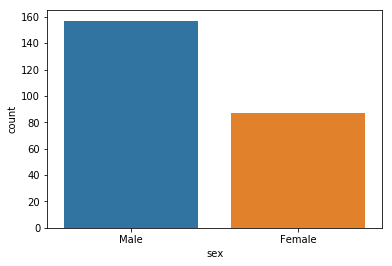

In [12]:
sns.countplot(x='sex', data=tips);

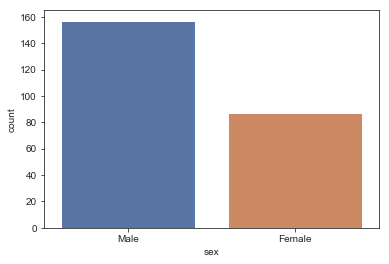

In [13]:
sns.set_style('ticks')
sns.countplot(x='sex', data=tips, palette='deep');

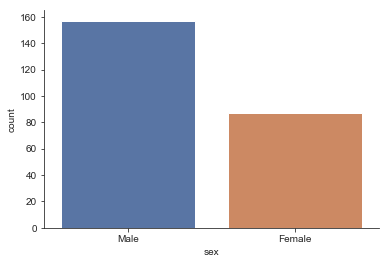

In [14]:
sns.countplot(x='sex', data=tips, palette='deep');
sns.despine()

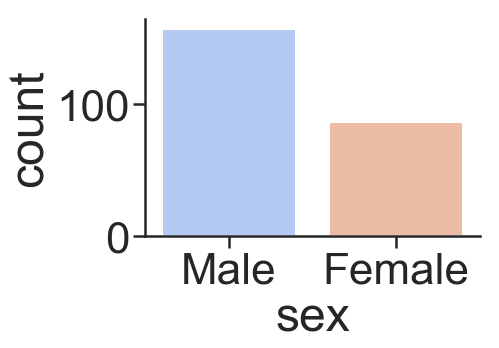

In [15]:
sns.set_context('poster',font_scale=2)
sns.countplot(x='sex',data=tips,palette='coolwarm')
sns.despine();

In [16]:
tips.groupby('sex').std()

,total_bill,tip,size
sex,,,
Male,9.246469,1.489102,0.955997
Female,8.009209,1.159495,0.937644


In [17]:
tips.groupby('sex')['total_bill'].std()

sex
Male      9.246469
Female    8.009209
Name: total_bill, dtype: float64

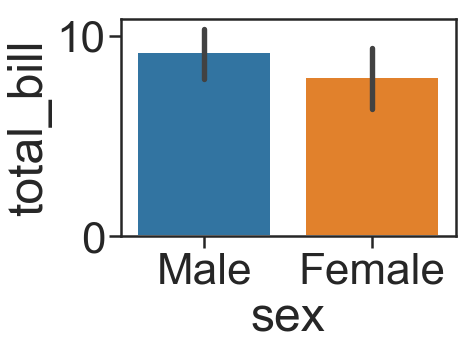

In [18]:
import numpy as np
sns.barplot(x='sex', y='total_bill', data=tips, estimator=np.std);

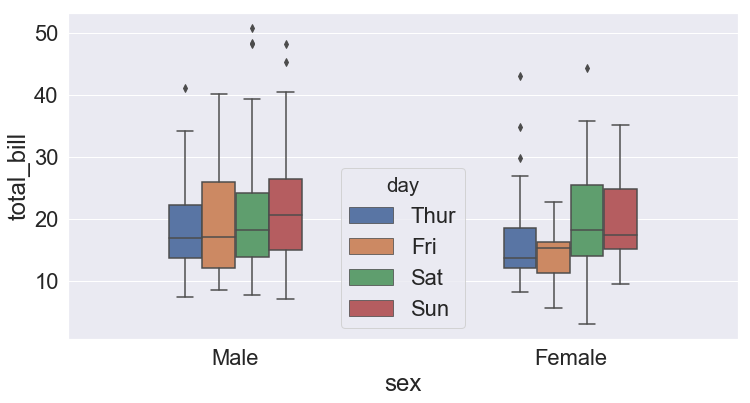

In [19]:
#sns.set(rc={'figure.figsize':(12, 6), 'font_scale':2.0}) # change the size of figures
sns.set(rc={'figure.figsize':(12, 6)})
sns.set(font_scale=2.0)
sns.boxplot(x='sex', y='total_bill', hue='day', data=tips, width=0.4);

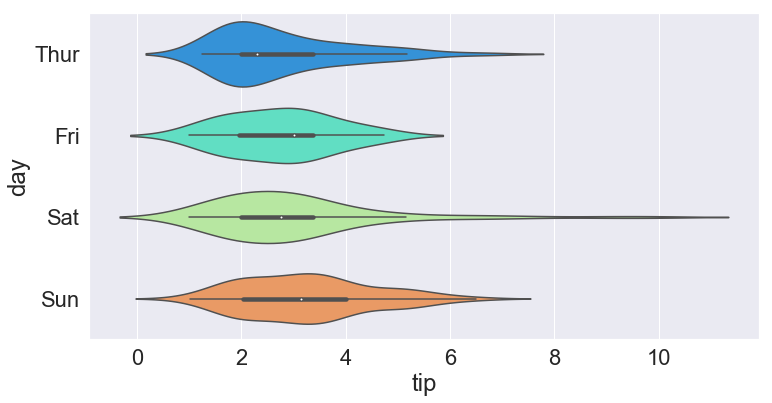

In [20]:
sns.violinplot(x="tip", y="day", data=tips,palette='rainbow');

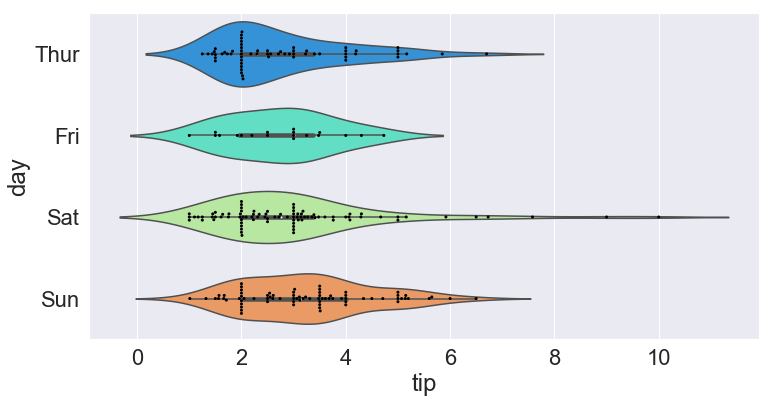

In [21]:
sns.violinplot(x="tip", y="day", data=tips,palette='rainbow')
sns.swarmplot(x="tip", y="day", data=tips,color='black',size=3)

# Distribution Plots

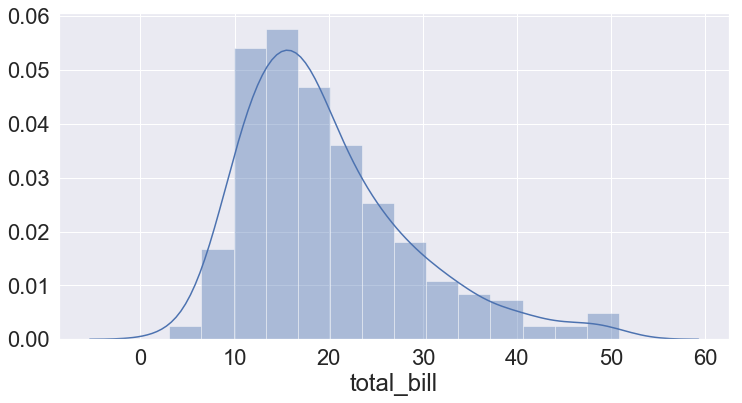

In [22]:
sns.distplot(tips['total_bill']);

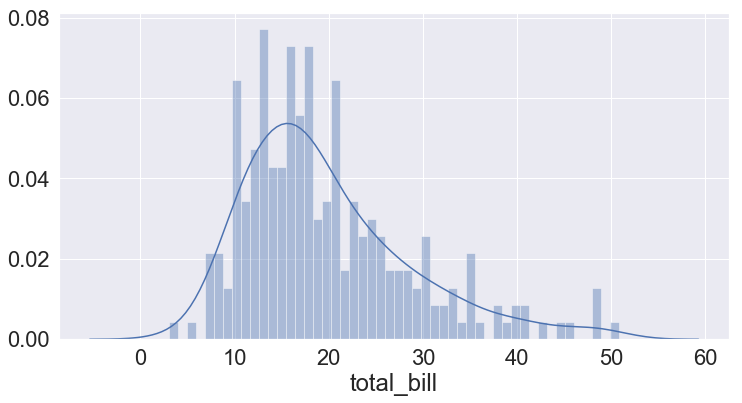

In [23]:
sns.distplot(tips['total_bill'], bins=50);

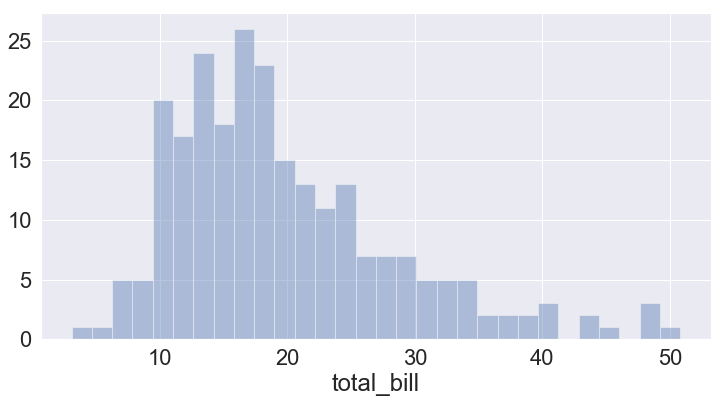

In [24]:
sns.distplot(tips['total_bill'], kde=False, bins=30);

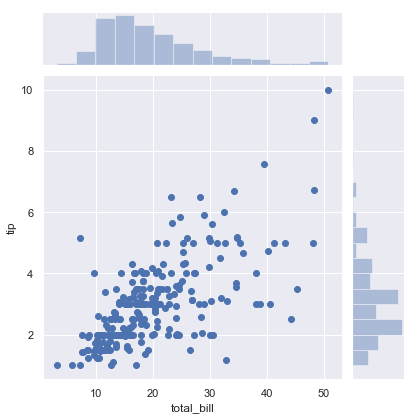

In [25]:
sns.set(rc={'figure.figsize':(16,12)})
sns.jointplot(x='total_bill', y='tip', data=tips, kind='scatter');

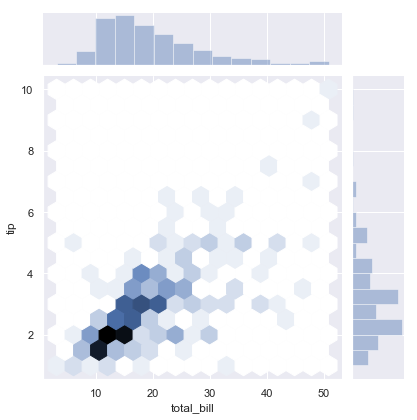

In [26]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex');

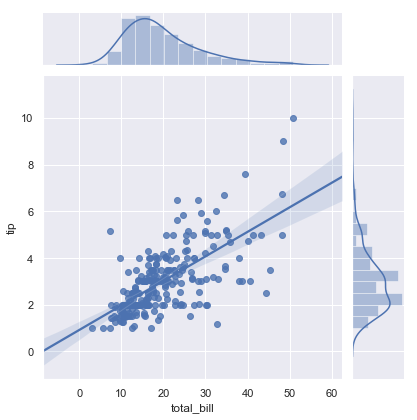

In [27]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg');

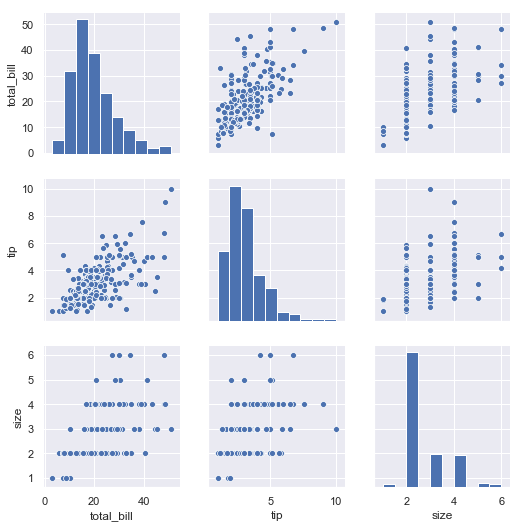

In [28]:
sns.pairplot(tips);

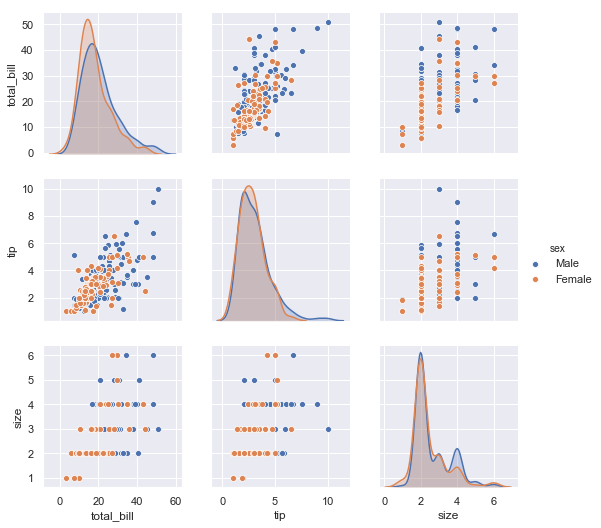

In [29]:
sns.pairplot(tips, hue='sex');

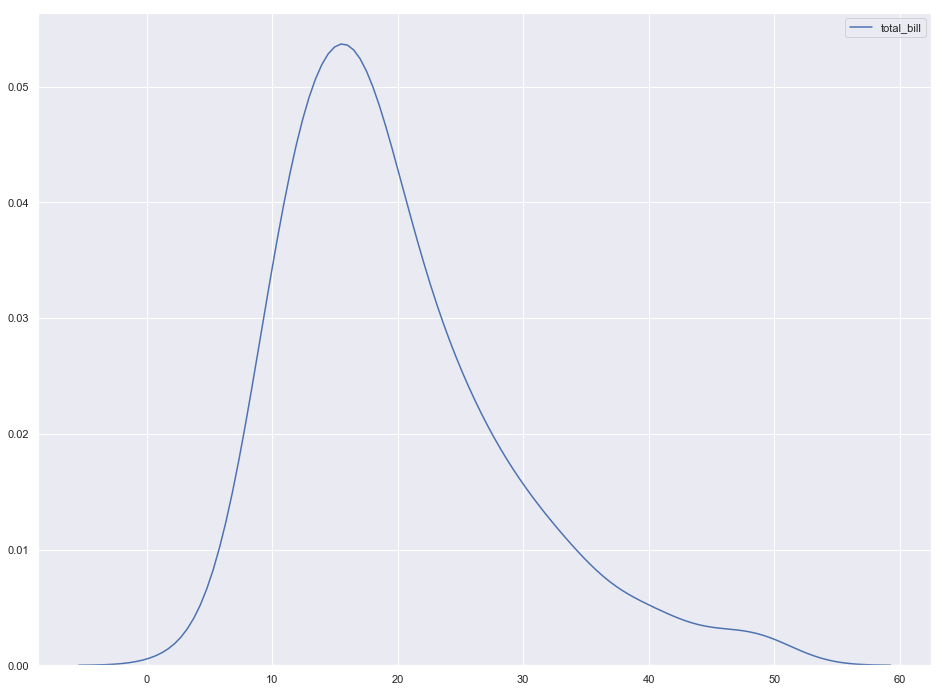

In [30]:
sns.kdeplot(tips['total_bill']);

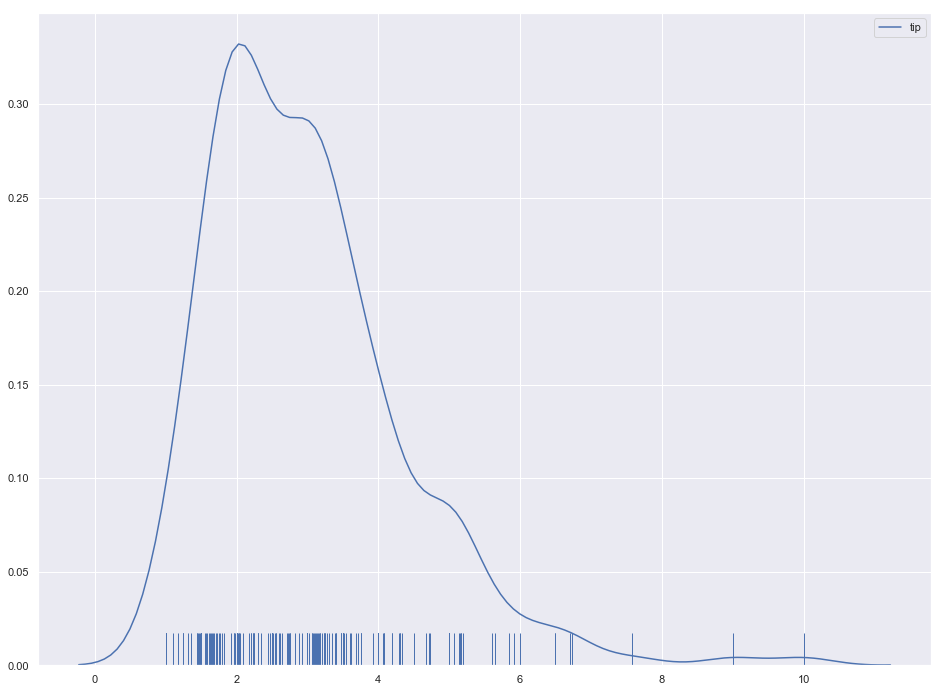

In [31]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip']);                  

# Matrix plots

In [32]:
flights = sns.load_dataset('flights')

In [33]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [34]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
year          144 non-null int64
month         144 non-null category
passengers    144 non-null int64
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [35]:
flights['year'].unique()

array([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960], dtype=int64)

In [36]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


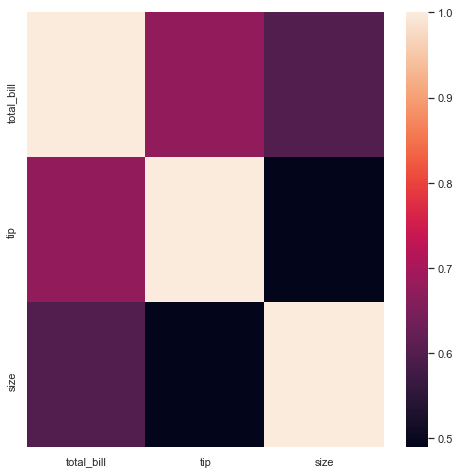

In [37]:
sns.set(rc={'figure.figsize':(8,8)})
sns.heatmap(tips.corr());

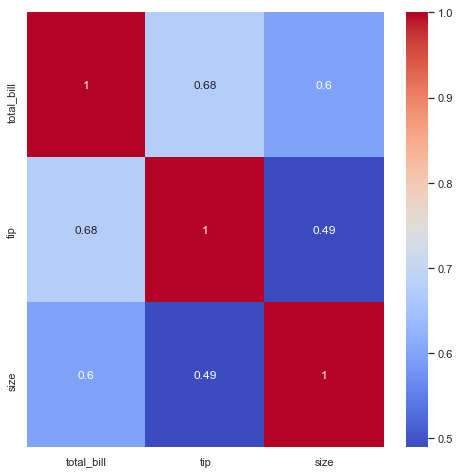

In [38]:
sns.heatmap(tips.corr(), cmap='coolwarm', annot=True);

In [39]:
flights.shape

(144, 3)

In [40]:
flights.pivot_table(values='passengers', index='month', columns='year')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


In [41]:
pvflights=flights.pivot_table(values='passengers', index='month', columns='year')

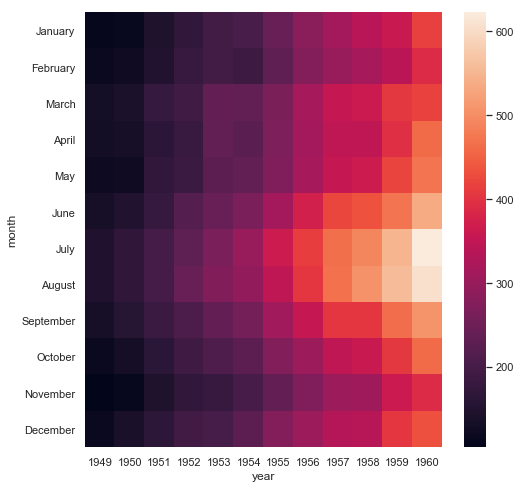

In [42]:
sns.heatmap(pvflights);

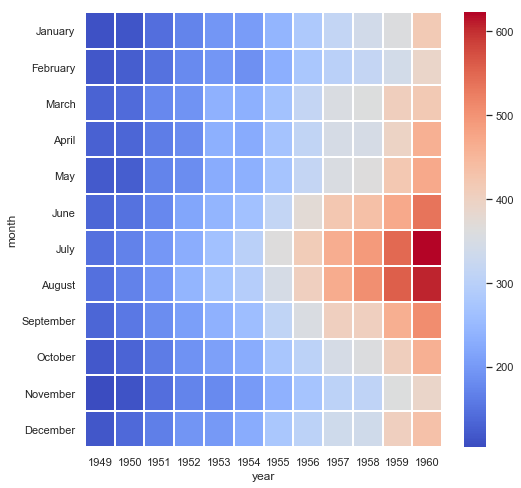

In [43]:
sns.heatmap(pvflights, cmap='coolwarm', linecolor='white', lw=1);

# Clustermap

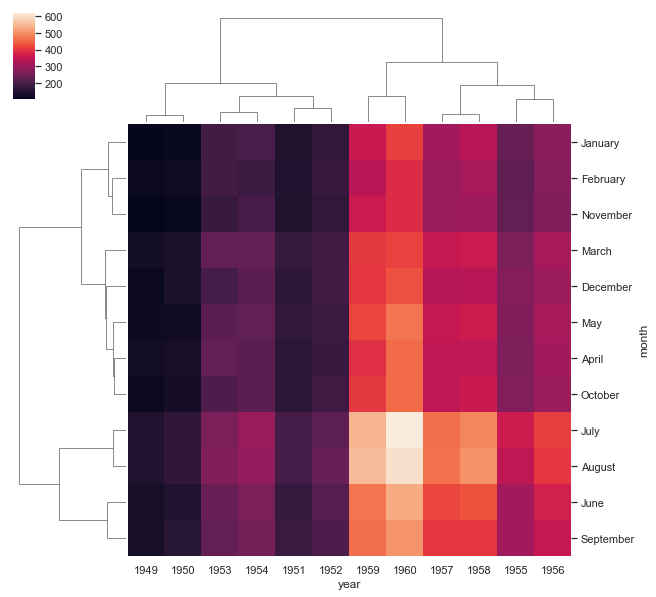

In [44]:
sns.clustermap(pvflights);

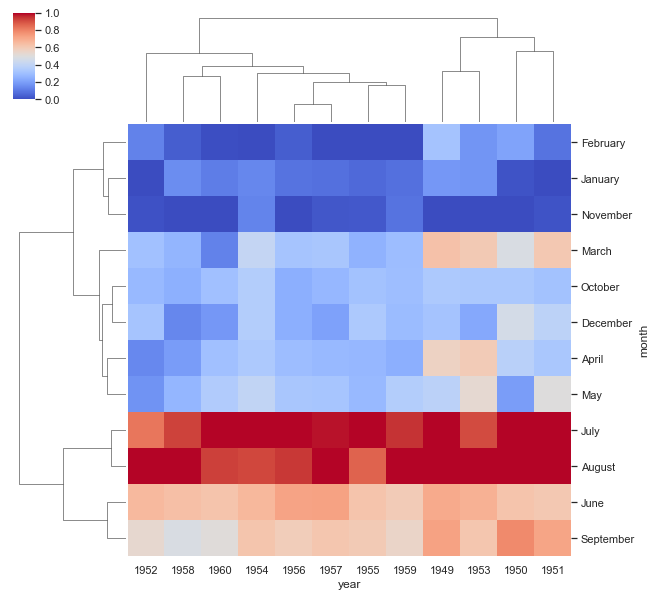

In [45]:
sns.clustermap(pvflights,cmap='coolwarm',standard_scale=1);